In [59]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline


In [46]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import tensorflow as tf
import gc
gc.enable()

In [47]:
dataset = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_a.csv')

In [48]:
dataset_users = [pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_'+user+'.csv', delimiter=',') for user in ['a','b','c','d','e']]

In [49]:
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15282 entries, 0 to 15281
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Values         15282 non-null  float64
 1   POW.AF3.Theta  15282 non-null  float64
 2   POW.AF3.Alpha  15282 non-null  float64
 3   POW.AF3.BetaL  15282 non-null  float64
 4   POW.AF3.BetaH  15282 non-null  float64
 5   POW.AF3.Gamma  15282 non-null  float64
 6   POW.T7.Theta   15282 non-null  float64
 7   POW.T7.Alpha   15282 non-null  float64
 8   POW.T7.BetaL   15282 non-null  float64
 9   POW.T7.BetaH   15282 non-null  float64
 10  POW.T7.Gamma   15282 non-null  float64
 11  POW.Pz.Theta   15282 non-null  float64
 12  POW.Pz.Alpha   15282 non-null  float64
 13  POW.Pz.BetaL   15282 non-null  float64
 14  POW.Pz.BetaH   15282 non-null  float64
 15  POW.Pz.Gamma   15282 non-null  float64
 16  POW.T8.Theta   15282 non-null  float64
 17  POW.T8.Alpha   15282 non-null  float64
 18  POW.T8

,Values,POW.AF3.Theta,POW.AF3.Alpha,POW.AF3.BetaL,POW.AF3.BetaH,POW.AF3.Gamma,POW.T7.Theta,POW.T7.Alpha,POW.T7.BetaL,POW.T7.BetaH,...,POW.T8.Theta,POW.T8.Alpha,POW.T8.BetaL,POW.T8.BetaH,POW.T8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
count,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,...,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000
mean,0.989007,275.641128,295.669953,211.317840,210.578262,163.766861,242.827849,267.169240,180.097321,171.701926,...,72.895201,39.443744,25.483356,29.265322,21.253473,280.738603,296.635399,208.256413,212.887431,169.029410
std,0.820208,581.198901,272.605152,162.662472,111.186466,90.564700,441.135218,304.104237,161.621648,107.929495,...,681.083439,173.511700,95.465049,51.896607,37.068089,584.910690,263.586781,155.787252,114.544620,97.155041
min,0.000000,11.111128,10.482314,9.770306,25.695267,16.165499,11.805817,15.091495,4.122430,14.624143,...,0.000003,0.000000,0.000000,0.000000,0.000005,13.004059,17.103785,7.802115,28.735771,19.256573
25%,0.000000,111.638224,137.341012,108.927771,139.503666,111.905674,89.451414,107.835754,88.362530,108.033170,...,6.630158,7.424178,6.123531,8.629707,7.113498,114.020973,138.387333,107.654303,137.691597,112.724022
50%,1.000000,178.178505,221.104073,170.798210,192.931221,147.791137,144.944176,175.018852,143.829003,151.471260,...,10.835902,12.257627,10.532611,13.976926,9.576085,183.625320,218.513061,173.220162,194.418671,149.747978
75%,2.000000,292.483131,367.080078,264.674217,259.118706,192.372875,245.732731,299.516426,224.808399,209.070393,...,20.195053,21.445551,17.939985,26.167399,17.459184,296.684418,364.454506,263.908203,262.463646,197.163719
max,2.000000,17666.017578,6095.287109,2427.682617,1587.710571,1065.477295,11774.806641,7881.771484,2688.726563,1809.549316,...,26345.796875,5625.630371,3863.484131,997.893860,850.612610,16924.259766,5982.326660,2243.265625,1437.919922,1222.559082


In [50]:
col = dataset.columns       # .columns gives columns names in data
features = col[1:]
target='Values'
print(features)

Index(['POW.AF3.Theta', 'POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH',
       'POW.AF3.Gamma', 'POW.T7.Theta', 'POW.T7.Alpha', 'POW.T7.BetaL',
       'POW.T7.BetaH', 'POW.T7.Gamma', 'POW.Pz.Theta', 'POW.Pz.Alpha',
       'POW.Pz.BetaL', 'POW.Pz.BetaH', 'POW.Pz.Gamma', 'POW.T8.Theta',
       'POW.T8.Alpha', 'POW.T8.BetaL', 'POW.T8.BetaH', 'POW.T8.Gamma',
       'POW.AF4.Theta', 'POW.AF4.Alpha', 'POW.AF4.BetaL', 'POW.AF4.BetaH',
       'POW.AF4.Gamma'],
      dtype='object')


In [51]:
dataset[target].value_counts()

Values
0.0    5225
2.0    5057
1.0    5000
Name: count, dtype: int64

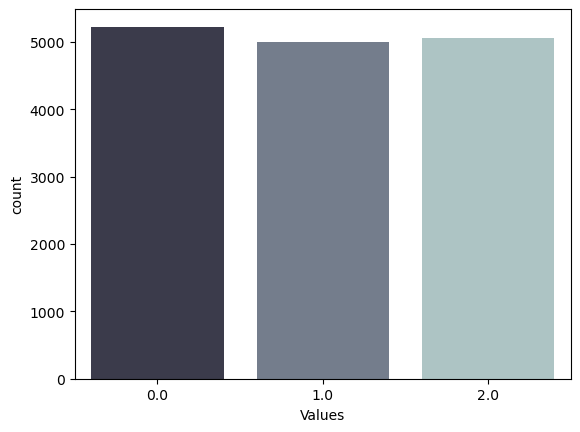

In [52]:
sns.countplot(x=target, data=dataset, palette="bone")
plt.show()

In [63]:
list_cor = pd.DataFrame(dataset[features].corr().unstack().abs().sort_values().drop_duplicates())
list_cor.columns = ['correlation_index']
list_corr_high = list(list_cor[-10:-1]['correlation_index'].index)
list_corr_high

total = dataset[features].isnull().sum().sort_values(ascending = False)
percent = (dataset[features].isnull().sum()/dataset[features].isnull().count()*100).sort_values(ascending = False)
missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

def preprocess_inputs(df, features, target):            
    col = df.columns       # .columns gives columns names in data
    features = col[1:]
    
    y = df.drop(features, axis=1)
    y = to_categorical(y)
    X = df[features]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    
    # Scale X with a standard scaler
    transformer = StandardScaler() 

    X_train_transformer = transformer.fit_transform(X_train)
    X_test_transformer = transformer.transform(X_test)

    return X_train_transformer, X_test_transformer, y_train, y_test

In [64]:
def train_model(dataset, features, target, build_model):
    # Step 1: Preprocess the input data
    X_train, X_test, y_train, y_test = preprocess_inputs(dataset, features, target)

    # Step 2: Build the model using the provided build_model function
    model = build_model(X_train)

    # Step 3: Define the training process
    def train(model, X_train, y_train):
        # Train the model with early stopping and validation split
        history = model.fit(
            X_train,
            y_train,
            validation_split=0.3,
            batch_size=32,
            epochs=30,
            verbose=0,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=3,
                    restore_best_weights=True
                )
            ]
        )
        return history

    # Step 4: Train the model and capture the training history
    history = train(model, X_train, y_train)

    # Step 5: Display training accuracy
    accuracy = np.mean(history.history['accuracy']) * 100
    std_dev = np.std(history.history['accuracy']) * 100
    print(f"Training Accuracy: {accuracy:.2f}% (+/- {std_dev:.2f}%)")

    # Step 6: Evaluate the model on the test data
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1] * 100
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Step 7: Generate predictions and classification report
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    classification_report_str = classification_report(y_test.argmax(axis=-1), y_pred)

    # Print the classification report if needed
    # print("Classification Report:\n", classification_report_str)

    # Step 8: Return the training history
    return history


In [65]:
def plot_accuracy_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [66]:
def plot_loss_history(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [67]:
def build_model_rnn(X):
    k2 = int(X.shape[1]**(1/2))  # Calculate square root of feature dimension
    inputs = tf.keras.Input(shape=(X.shape[1],))  # Define the input shape

    # Use Lambda layer to reshape the input
    expand_dims = tf.keras.layers.Lambda(lambda x: tf.reshape(x, (-1, k2, k2)))(inputs)

    # Add LSTM layers with Dropout
    lstm = tf.keras.layers.LSTM(32, return_sequences=True)(expand_dims)
    drop = tf.keras.layers.Dropout(0.4)(lstm)
    lstm = tf.keras.layers.LSTM(16, return_sequences=True)(drop)
    drop = tf.keras.layers.Dropout(0.4)(lstm)

    # Flatten the output for Dense layer
    flatten = tf.keras.layers.Flatten()(drop)

    # Add Dense layer for classification
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

    # Compile the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


Training Accuracy: 61.22% (+/- 7.15%)
Test Accuracy: 71.61%
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


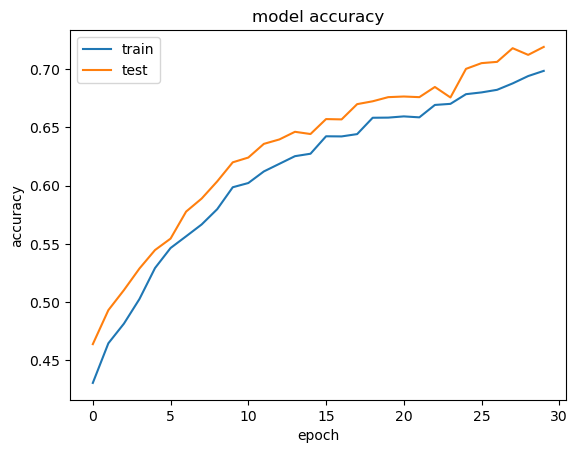

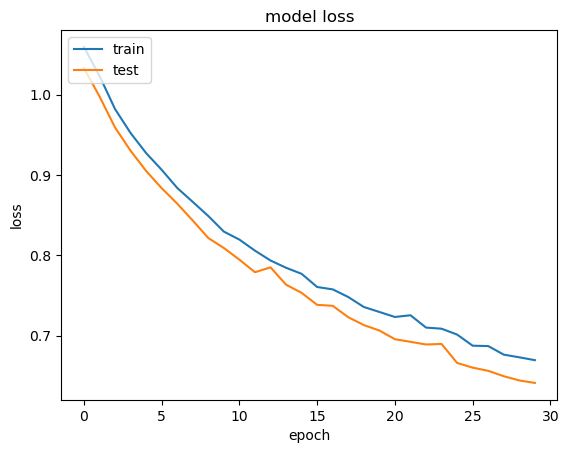

Training Accuracy: 56.80% (+/- 5.54%)
Test Accuracy: 62.68%
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


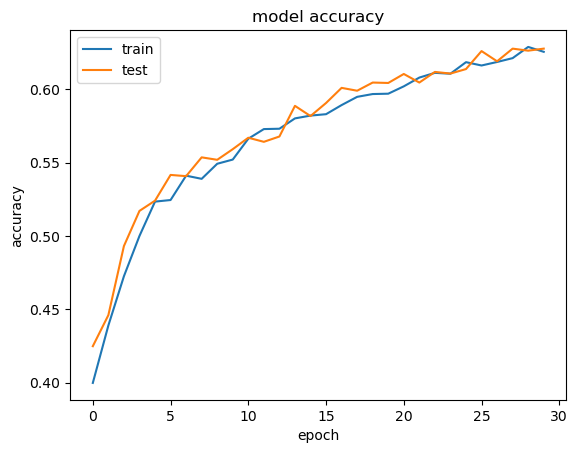

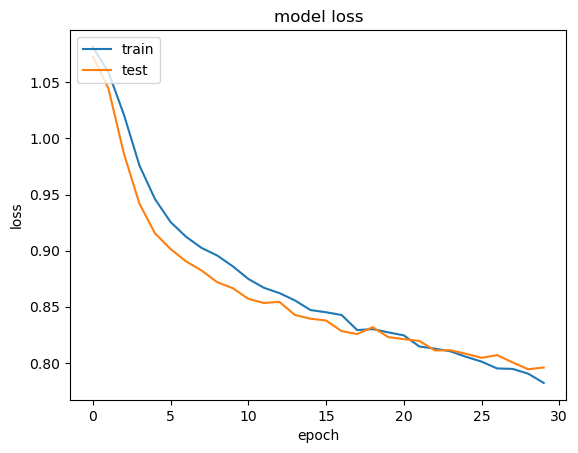

Training Accuracy: 56.13% (+/- 2.93%)
Test Accuracy: 59.71%
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


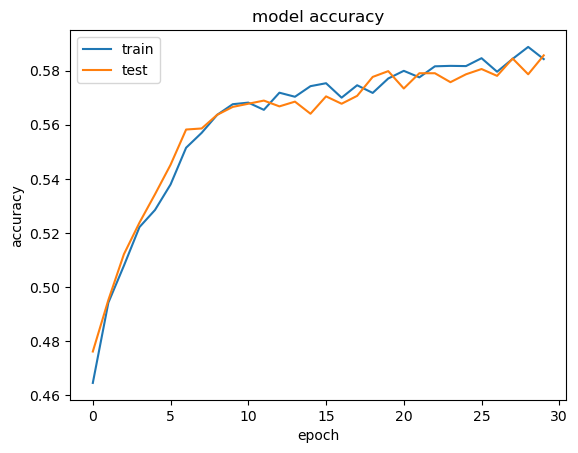

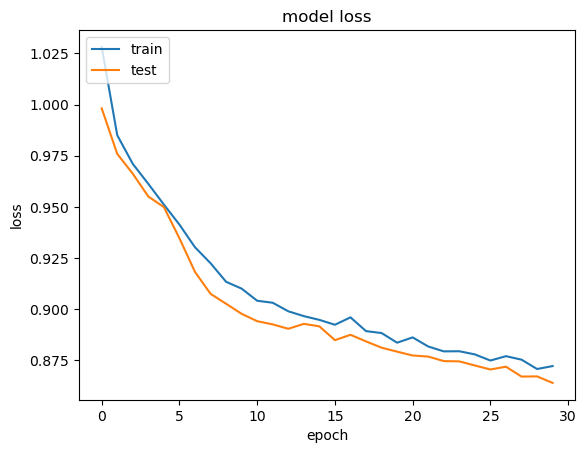

Training Accuracy: 58.98% (+/- 5.44%)
Test Accuracy: 64.20%
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


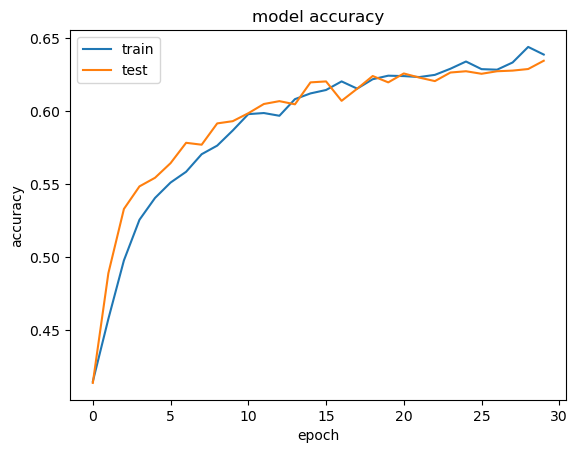

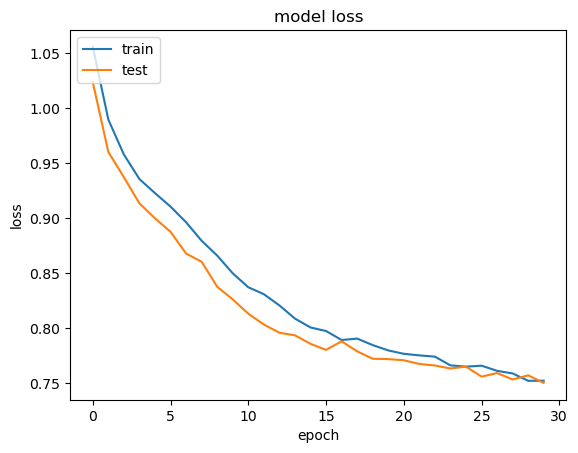

In [68]:
for dfs in dataset_users:
    history = train_model(dfs, features, target,build_model=build_model_rnn)
    plot_accuracy_history(history)
    plot_loss_history(history)